# Fashion MNIST

- Gaol: Classify fashion images
- Type: Multiclass Classification

### Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.datasets.fashion_mnist import load_data

from tensorflow.keras.layers import Dense, Input

from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

### Plot style configuration

In [2]:
FIGSIZE = (12, 10)

plt.rc('figure', figsize=FIGSIZE)
sns.set_style('whitegrid')

### Load data

In [4]:
(X_train, y_train), (X_test, y_test) = load_data()

assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 7us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 272s 10us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 62s 14us/step


### EDA

In [5]:
pd.Series(y_train).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
Name: count, dtype: int64

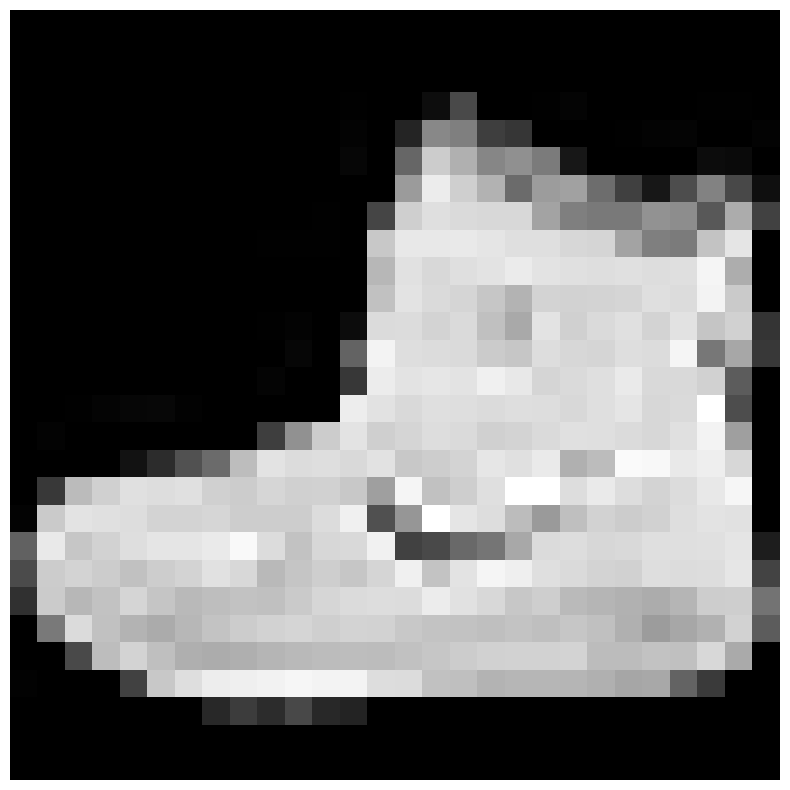

In [6]:
plt.imshow(X_train[0], cmap='gray')
plt.axis('off')
plt.show()

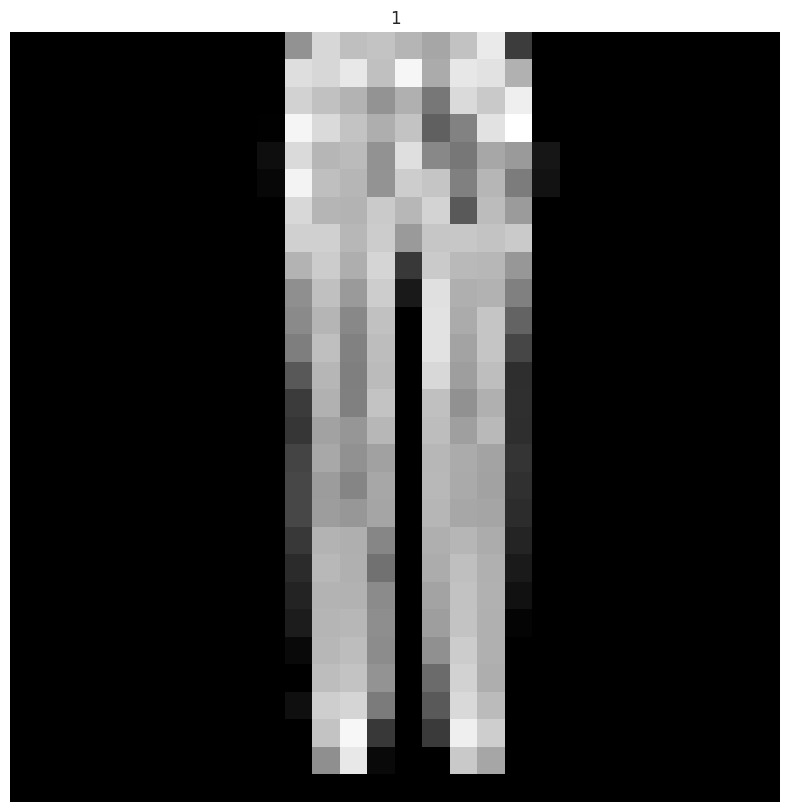

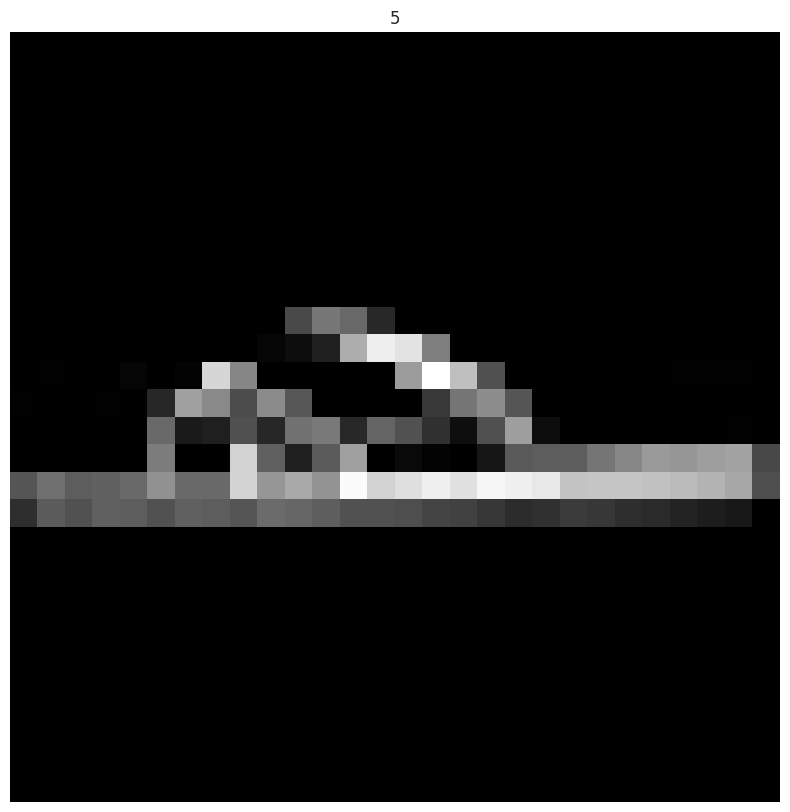

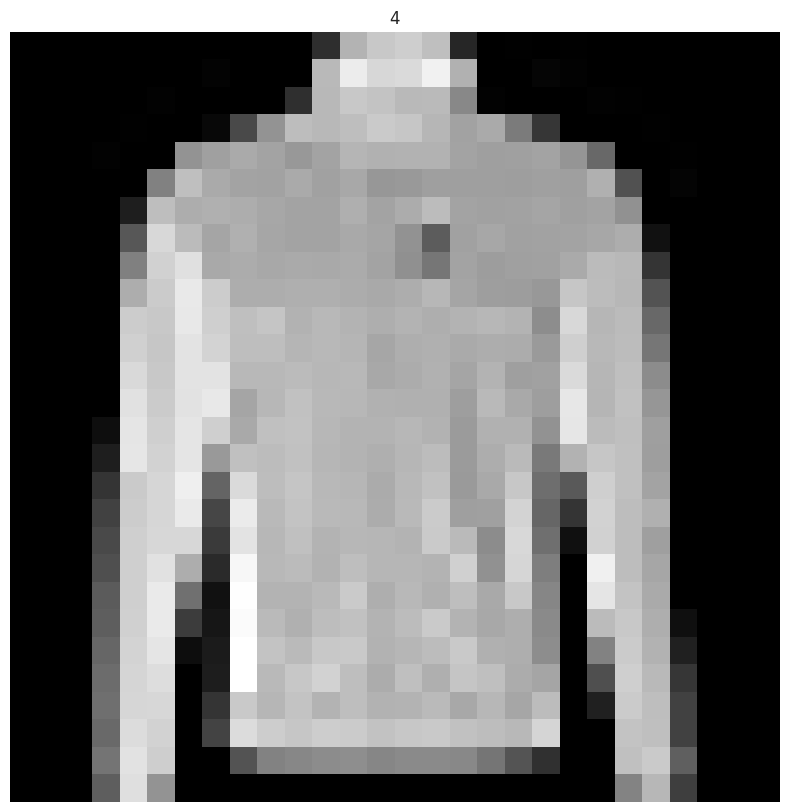

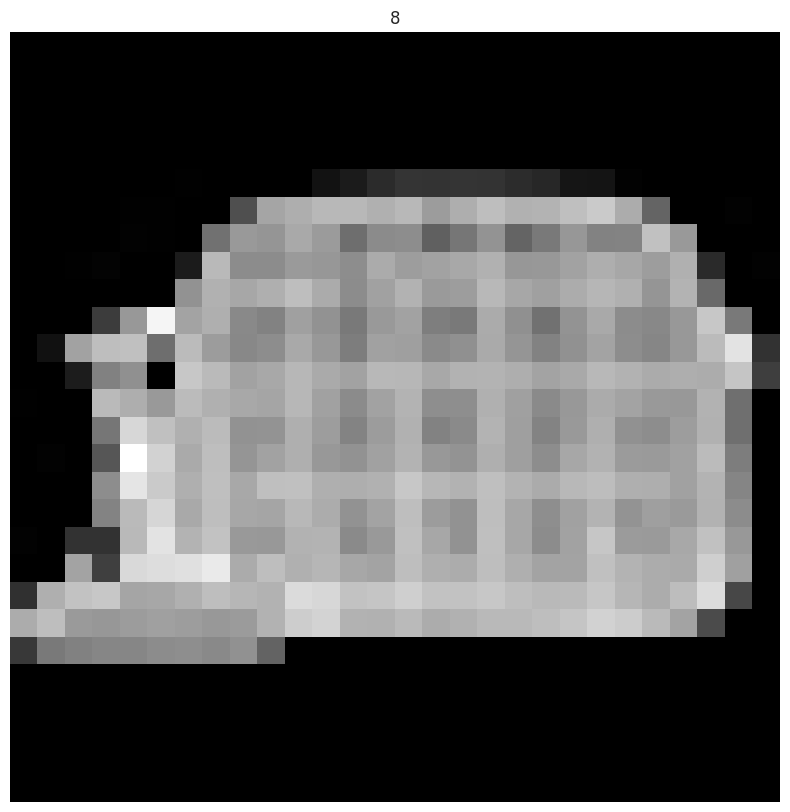

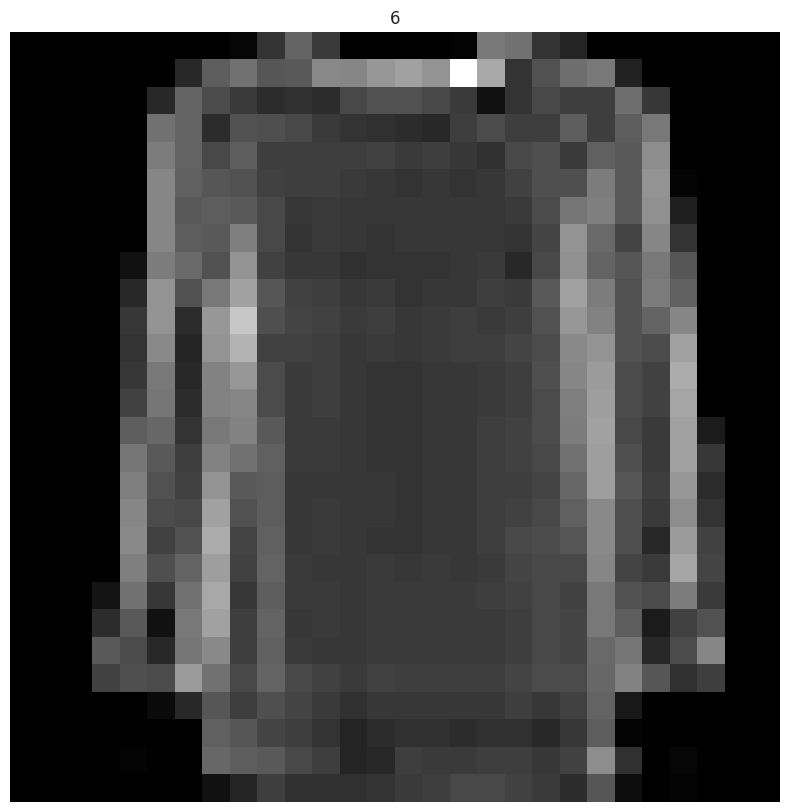

In [7]:
def plot_random(n):
  indices = np.random.choice(X_train.shape[0], n, replace=False)

  for i in indices:
    plt.title(y_train[i])
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
    plt.show()

plot_random(5)

### Preprocessing

In [8]:
def preprocess_inputs(data):
  # since we want to pass a whole image to a NN
  # that image must be one vector, not a matrix
  data = data.reshape(-1, 28 * 28)

  # Scale values to be between 0 and 1
  data = data.astype(float) / 255.0

  return data

In [9]:
X_train = preprocess_inputs(X_train)
X_test = preprocess_inputs(X_test)

In [10]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

### Model building

In [16]:
model = tf.keras.Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10)
])

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=Adam(),
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    epochs=5,
    validation_split=0.30,
    batch_size=32,
    verbose=2
)

Epoch 1/5
1313/1313 - 6s - 4ms/step - accuracy: 0.8196 - loss: 0.4961 - val_accuracy: 0.8457 - val_loss: 0.4048
Epoch 2/5
1313/1313 - 5s - 4ms/step - accuracy: 0.8637 - loss: 0.3706 - val_accuracy: 0.8723 - val_loss: 0.3469
Epoch 3/5
1313/1313 - 6s - 4ms/step - accuracy: 0.8773 - loss: 0.3316 - val_accuracy: 0.8740 - val_loss: 0.3480
Epoch 4/5
1313/1313 - 5s - 4ms/step - accuracy: 0.8872 - loss: 0.3054 - val_accuracy: 0.8841 - val_loss: 0.3269
Epoch 5/5
1313/1313 - 5s - 3ms/step - accuracy: 0.8931 - loss: 0.2872 - val_accuracy: 0.8834 - val_loss: 0.3242


In [19]:
model.evaluate(X_test,
    y_test,
    batch_size=32,
    verbose=2
)

313/313 - 0s - 2ms/step - accuracy: 0.8770 - loss: 0.3512


[0.3512173593044281, 0.8769999742507935]